## Examples

#### Regular PCA

In [8]:
# DGP 
from sklearn.datasets import fetch_olivetti_faces
X,y = fetch_olivetti_faces(return_X_y=True)

A cool feature of sklern PCA object is that it handles automoatically the centering of the data, so that everything can work thine.

In [9]:
from sklearn.decomposition import PCA
import numpy as np

# using PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X= X) 

If standardizig the data is necessary for solving feature scale ussues, then the following code does the work.It will set the mean and variance of every feature to be, respectively, zero and one.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

workflow = Pipeline([
    ("scaler", StandardScaler),
    ("pca", pca),
])

Anothe cool thing of sklearn PCA is that instead of telling how many principal components you want, you can tell it how much of the data total variance you want to preserve

In [21]:
pca = PCA(n_components=0.95) # 95% variance preserved
X_reduced = pca.fit_transform(X)

pca.explained_variance_ratio_ # this one returs a list with the percentage of variance explained by the respective feature 

array([0.2381273 , 0.13993973, 0.07968614, 0.04998326, 0.03609845,
       0.03156934, 0.02426832, 0.02036397, 0.01958113, 0.01672124,
       0.01595221, 0.01436981, 0.01246741, 0.01147133, 0.01062878,
       0.0097772 , 0.00919061, 0.00815574, 0.00753875, 0.00746985,
       0.00698578, 0.00614628, 0.00583927, 0.00569722, 0.00546191,
       0.00531855, 0.00513816, 0.00495841, 0.00457664, 0.00441183,
       0.00402002, 0.0038419 , 0.00361951, 0.00334542, 0.00320381,
       0.00316041, 0.00305147, 0.00298635, 0.00282141, 0.00274006,
       0.00259772, 0.0025399 , 0.00244547, 0.0023984 , 0.0023089 ,
       0.00226419, 0.00222286, 0.00220443, 0.00208921, 0.00204983,
       0.00196843, 0.00191436, 0.00185046, 0.00178939, 0.00177608,
       0.00172483, 0.00168585, 0.00164168, 0.00161885, 0.00158394,
       0.00155428, 0.00152233, 0.00149958, 0.00147712, 0.00142609,
       0.00140598, 0.00136941, 0.00133973, 0.00130915, 0.0012872 ,
       0.00127428, 0.00126232, 0.00123801, 0.00121334, 0.00117

For creating a plot showing the % of variance exaplained wrt the number of principal components considered:

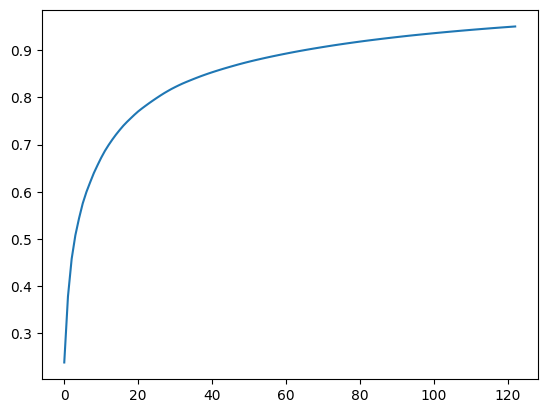

In [22]:
import numpy as np
from matplotlib import pyplot as plt

cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumsum)

Let's try printing the principal components of the reduced images from the olivetti images dataset. 

In [27]:
import logging

import matplotlib.pyplot as plt
from numpy.random import RandomState

from sklearn import cluster, decomposition
from sklearn.datasets import fetch_olivetti_faces

rng = RandomState(0)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
n_samples, n_features = faces.shape

# Global centering (focus on one feature, centering all samples)
faces_centered = faces - faces.mean(axis=0)

# Local centering (focus on one sample, centering all features)
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

Dataset consists of 400 faces


In [28]:
import matplotlib.pyplot as plt

# Select a reduced image (e.g., the first one in X2D)
reduced_image = X_reduced[0].reshape(1, -1)  # Reshape to a 2D grid if necessary

print(X_reduced[0].shape)

(123,)


In [29]:
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

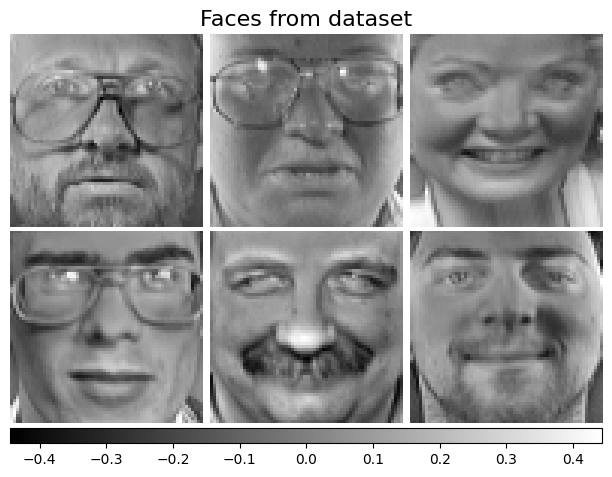

In [30]:
plot_gallery("Faces from dataset", faces_centered[:n_components])

As example, for analysing brain images one could create a pipeline that works like this: 

In [31]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("pca", PCA(n_components=0.95)),
    ("ica", FastICA(n_components=0.95))
])

#### Randomized PCA 
This one uses a stochastic optimiation algorithm, leveraging the SVD. It is less computationally expensive than classic PCA and thus it has to be used when the dataset starts getting very big. infact standard PCA is pretty slow and expensive. 

In [32]:
rnd_pca = PCA(n_components = 154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X)

Note that this solver is automatically used when the data become big, by conditions set into the PCA() class.

#### Kernal PCA

In [ ]:
from sklearn.decomposition import KernelPCA

# creating and usng it
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X = rbf_pca.fit_transform(X)

How can we choose the right kernel? Realistically we can treat the kernel as a hyperparameter of the model, thus finding the best one through GridSearch and cross-validation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# build a pipeline, the logistic regression will take as input the kpca ouput to make predictions 
clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

# set a grid search
param_grid = [{
    "kpca__gamma": np.linspace(0.03,0.05,10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid=param_grid, cv = 2)
grid_search.fit(X, y)

# look at the best set of parameters found between the tested ones
grid_search.best_estimator_

## Exercises

1. What are the main motivations for reducing a dataset dimensionality? What are the main drawbacks?

PRO: 
- having less dimensions to work with reduces the time needed for the model training
- if the dimensions are reduced to 2 or 3 then the data can be visualized
- removing some dimensions can, occasionally, remove redundancies in the data, improving the overall model

CONS:
- information loss

2. What is the curse of dimensionality?

The curse of dimensionality is a way to address the difficulties that come from having to deal with high-dimensional data. Specifically in higher dimensions optimizing becomes more difficult and also the data we have may not reppresent in the best way possible the overall population, causing our model to perform way worse.

3. Can PCA be used to reduce the dimensionality f a highly non-linear dataset?

No, it cannot. Infact PCA assumes that our data can be moslty explained on hyperplanes, linear subspaces in the feature space. If this assumption doesn't hold, then PCA won't work. For this reason we have also talked of Kernal PCA

4. Does it make any sense to chain two different dimensionality reduction algorithm on your data set? 

Yes it does. infact you can chain two different dimensionality reduction algorithms so that the overall time needed for the task is diminisched. As an example, the first one could be a PCA, while the second one could be a kernel PCA with a complex Kernel. Even if n the end the result would be the same of applying only the second algorithm, we achieve it in a fraction of the time.  

5. On the MNIST dataset compare the performance of a random forest and training time needed, using or not a PCA to reduce the dimensionality of the data

In [ ]:
# models
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

rf = RandomForestClassifier()
pca = PCA(n_components=0.95)
pip_pca = Pipeline([
    ("pca", pca),
    ("rf", rf)
]) 
tsne = TSNE()

In [ ]:
# data 
from sklearn.datasets import fetch_openml
from sklearn.model_selection import StratifiedShuffleSplit

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
sss = StratifiedShuffleSplit(n_splits=1, test_size=10000)
X_train_idx, X_test_idx = next(sss.split(X,y))

In [ ]:
# generating training and test sets
X_train = X[X_train_idx]
y_train = y[X_train_idx]
X_test = X[X_test_idx]
y_test = y[X_test_idx]

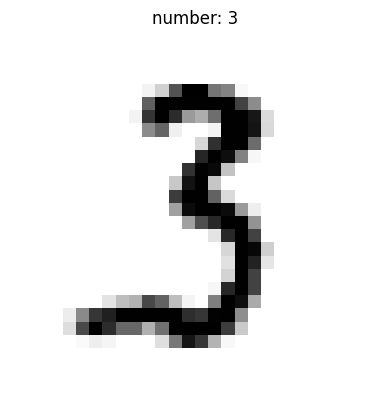

In [ ]:
# example
import matplotlib.pyplot as plt
    
some_face = X_train[67] # changing the index here shows a different number
some_face_image = some_face.reshape(28,28)

plt.imshow(some_face_image, cmap = "binary")
plt.title(f"number: {y_train[67]}")
plt.axis("off")
plt.show()

In [ ]:
# model without pca
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

# time needed: 1 m
# score (overall accuracy): 0.9681

0.9681

In [ ]:
# model with pca applied beforehand
pip_pca.fit(X_train, y_train)
pip_pca.score(X_test, y_test)

# time needed: 2m 31s
# score (overall accuracy): 0.946

0.946

Training is actually more than twice slower applying a PCA on the data. How can that be? Dimensionality reduction does not always lead to faster training time: it depends on the dataset, the model and the training algorithm

In [ ]:
# model with tsne
tsne = TSNE(n_components=2, random_state=42)
X_train_reduced = tsne.fit_transform(X_train)
X_test_reduced = tsne.fit_transform(X_test)

rf_tsne = RandomForestClassifier()
rf_tsne.fit(X_train_reduced, y_train)
rf_tsne.score(X_test_reduced, y_test)

# time needed: 12m 40s
# score (overall accuracy): 0.5793

0.5793

Overall using tsne as a pure dimensionality reduction technique yielda a dramatic deacrease in model performance. T-sne shines the most in visualizing the data, and not as a pure dim red technique

In [ ]:
# let's visualize the data
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

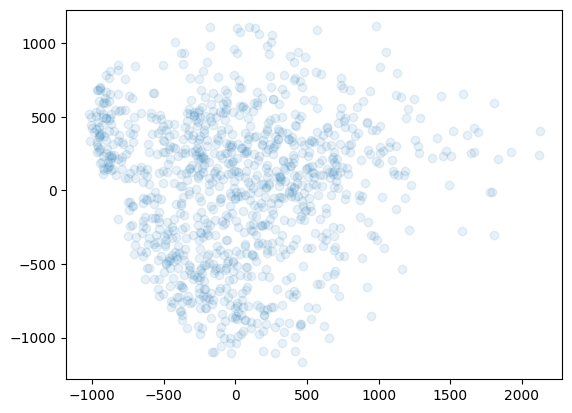

In [ ]:
plt.scatter(X_train_pca[1:1000,0],X_train_pca[1:1000,1], alpha=0.1)

In [ ]:
# let's use the t-sne dimensionality reduction algorithm
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
pca = PCA(n_components=0.95)

pip_dr = Pipeline([
    ("pca", pca),
    ("tsne", tsne)
])

X_train_tsne = pip_dr.fit_transform(X_train[:10000])


In [ ]:
# funtion to visualize the dimensionality reuction result
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

def plot_digits(X, y):
    plt.figure(figsize=(13,10))
    X = MinMaxScaler().fit_transform(X)
    y = y.astype(int)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="jet", alpha=0.5)
    plt.axis('off')
    plt.colorbar()
    plt.show()

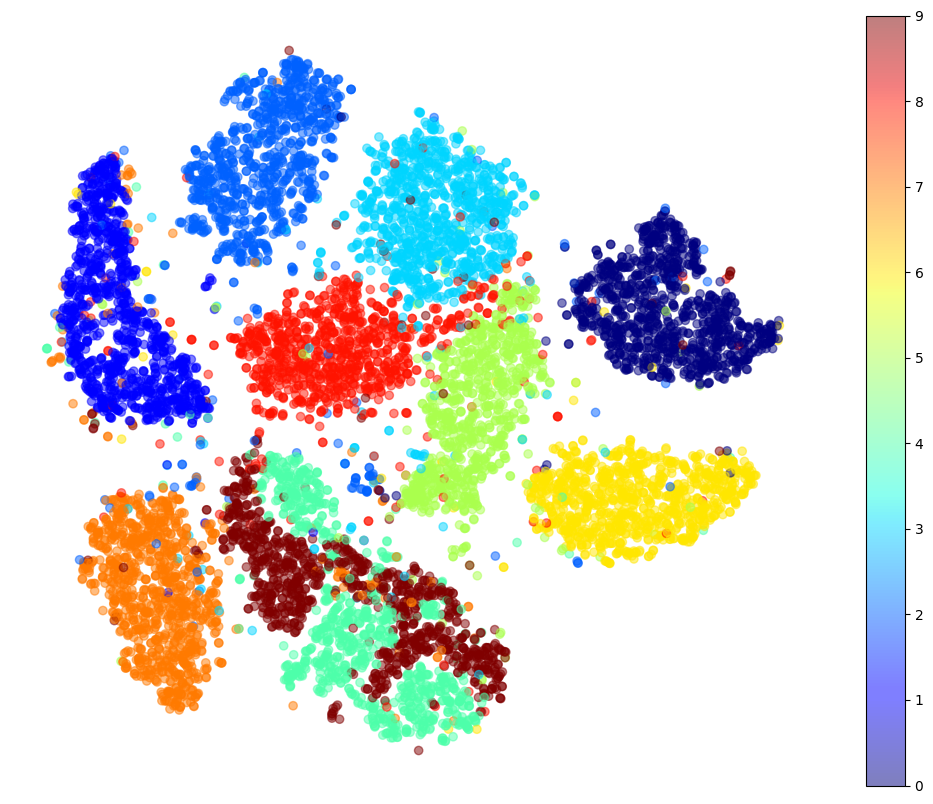

In [ ]:
plot_digits(X_train_tsne, y_train[:10000])

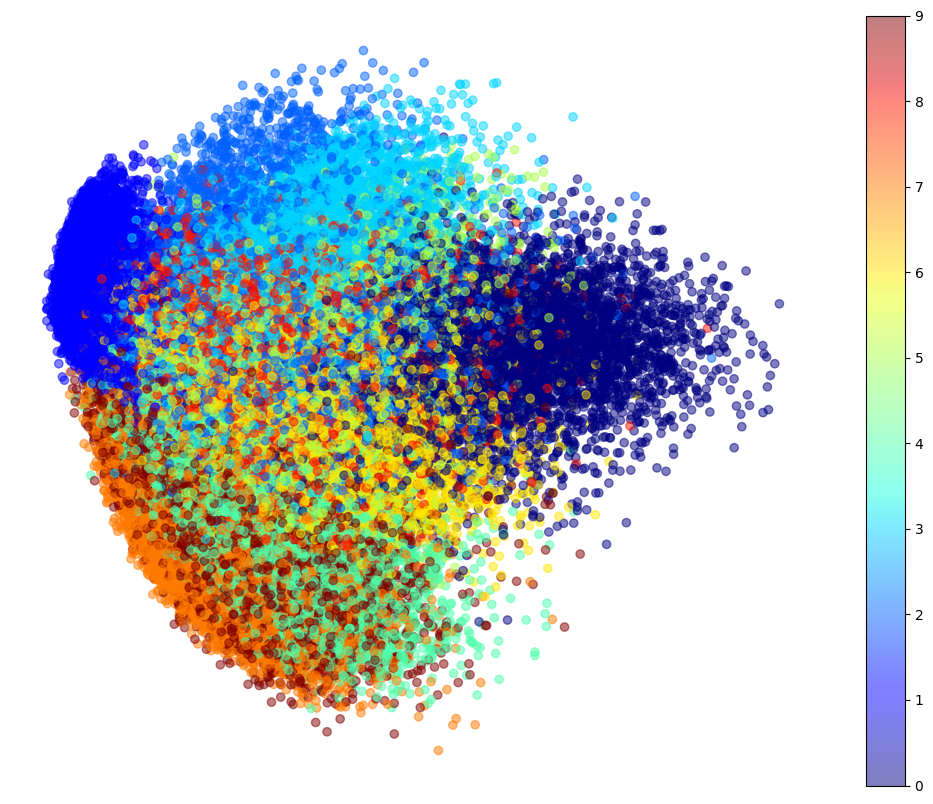

In [ ]:
plot_digits(X_train_pca, y_train)

Comparing how this ended up using PCA or T-SNE for data visualization, it turns out that t-SNE does a better job in making us visualiing the data.